In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

In [220]:
df = pd.read_csv('./xeno-canto_ca-nv_index.csv')
df = df.drop(columns = ['Unnamed: 0','country','file_id','file_name','file_url','full_name','license','recordist','recordist_url','sonogram_url','remarks'])
df = df.rename(columns={"duration_seconds": "duration", "english_cname": "name"})
df.head()

,duration,name,genus,latitude,location,longitude,species,type
0,3,Abert's Towhee,Melozone,33.3117,"Cibola National Wildlife Refuge, Cibola, Arizo...",-114.68912,aberti,'seet' call
1,4,Abert's Towhee,Melozone,34.2850,"Bill Williams River NWR, Arizona, United States",-114.06900,aberti,call
2,4,Abert's Towhee,Melozone,34.2850,"Bill Williams River NWR, Arizona, United States",-114.06900,aberti,Squeal duet
3,5,Abert's Towhee,Melozone,33.1188,"Salton Sea, CA, United States",-115.79450,aberti,interaction duet
4,5,Abert's Towhee,Melozone,36.0628,"Sunset Park, Las Vegas, Nevada, United States",-115.11280,aberti,call


In [221]:
# Cleaning up the types into either a call or a song
def type_clean (type_str):
    call = ['call', 'chatter', 'male', 'squeal', '?', 'barks', 'tick' ,'gargle', 'chip', 'wing']
    song = ['song', 'drumming', 'tapping', 'duet', 'display']

    for i in song:
        if i in type_str.lower():
            return 'song'
    for i in call:
        if i in type_str.lower():
            return 'call'
    return type_str
    
df['type'] = df['type'].apply(type_clean);

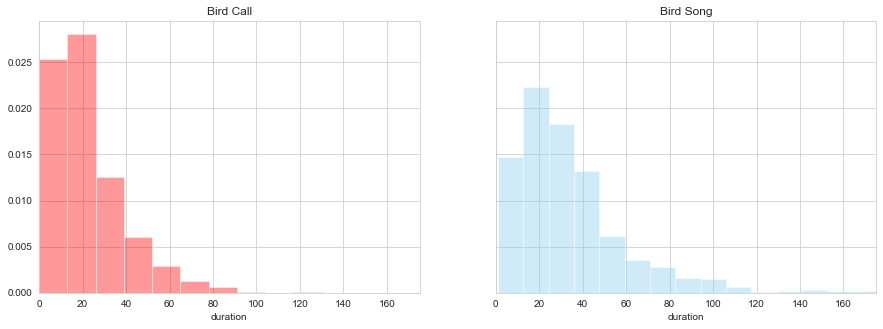

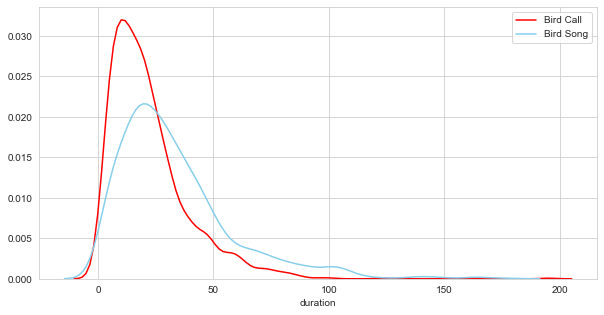

In [223]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,sharex=True, figsize = (15,5))
sns.distplot(df['duration'].loc[df['type'] == 'call'], color = 'red', norm_hist = True, bins = 15, kde = False, ax=ax1).set_title('Bird Call')
sns.distplot(df['duration'].loc[df['type'] == 'song'], color = 'skyblue', norm_hist = True, bins = 15, kde = False, ax=ax2).set_title('Bird Song')
plt.xlim(0, 175)

fig, ax3 = plt.subplots(sharey=True, figsize = (10,5))
sns.distplot(df['duration'].loc[df['type'] == 'call'], color = 'red', norm_hist = True, bins = 15, hist = False, ax=ax3, label = ('Bird Call'))
sns.distplot(df['duration'].loc[df['type'] == 'song'], color = 'skyblue', norm_hist = True, bins = 15, hist = False, ax=ax3, label = ('Bird Song'))
plt.legend();

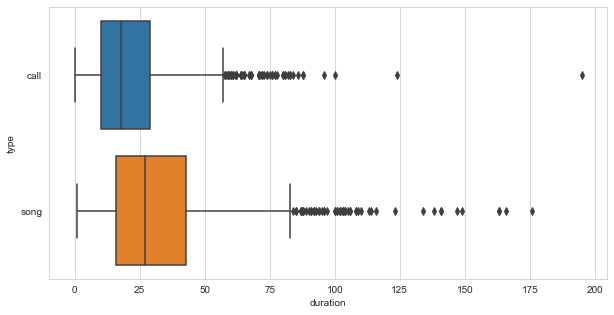

In [226]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(x = 'duration', y = 'type', data = df, ax=ax);

In [195]:
df['duration'].loc[df['type'] == 'call'].mean()

22.16073147256978

In [196]:
df['duration'].loc[df['type'] == 'song'].mean()

33.76047904191617

In [ ]:
# bird call vs bird song
# location; lat and long
# species + genus